# Explore Datasets (Plot File Download Duration of all Trace Pairs Across all Datasets)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from glob import glob
from os.path import join, dirname
from json import load as json_load

In [2]:
### MODIFY BEGIN ###

# Specify parent directory of datasets directory.
DATASETS_DIR_PARENT = "/root/mixcorr/"

###  MODIFY END  ###

In [3]:
def exp_load_flowpairs(
    exp_name: str):
    """
    Takes the name of an experiment, loads all `flowpair.json` files beneath its dataset in
    our format, calculates each download's duration in seconds, and builds a Pandas DataFrame
    out of all calculated durations.
    Mind: This will load _all_ trace pairs from this dataset, not just the ones of a particular
          split of the dataset ("train", "val", or "test") or even just the first 35,000.
    """
    
    # Construct path to dataset in our format that holds all `flowpair.json` files.
    proc_exp_dir_our = join(DATASETS_DIR_PARENT, f"dataset_{exp_name}_filtered-to-start-end")
    
    # Find all flowpairs of in the dataset of this experiment in our format.
    flowpairs_paths = sorted(glob(join(proc_exp_dir_our, "*", "flowpair.json")))
    
    # Holds the final list of download duration times (`end` - `start`).
    downloads_durations = np.zeros(len(flowpairs_paths), dtype = np.float64)
    
    for idx, flowpair_path in enumerate(flowpairs_paths):
        
        # Load JSON from this download's `flowpair.json`.
        with open(flowpair_path, "r", encoding = "utf-8") as flowpair_fp:
            flowpair = json_load(flowpair_fp)

        # Calculate download duration and convert from nanoseconds to seconds.
        download_duration = np.uint64(flowpair["end"] - flowpair["start"])
        download_duration_sec = download_duration / np.float64(1000000000.0)
        
        assert type(download_duration_sec) == np.float64
        assert download_duration_sec > 0.0
        
        # Store seconds duration in prepared NumPy array.
        downloads_durations[idx] = download_duration_sec
    
    # Extract only experiment index from full name.
    exp_id = exp_name.split(sep = "_", maxsplit = 1)[0]

    # Set descriptive experiment name depending on its index.
    exp_name = "missing"
    if exp_id == "exp01":
        exp_name = "baseline"
    elif exp_id == "exp02":
        exp_name = "no-cover"
    elif exp_id == "exp05":
        exp_name = "low-delay"
    elif exp_id == "exp06":
        exp_name = "high-delay"
    elif exp_id == "exp08":
        exp_name = "live-nym"
    
    # Build Pandas DataFrame from NumPy array of download durations in seconds.
    df = pd.DataFrame(downloads_durations, columns = [exp_name])
    
    return df

In [4]:
# Load Pandas DataFrame of all `flowpair.json` files of dataset baseline (exp01) in our format.
df_exp01 = exp_load_flowpairs("exp01_nym-binaries-1.0.2_static-http-download")

In [5]:
# Load Pandas DataFrame of all `flowpair.json` files of dataset no-cover (exp02) in our format.
df_exp02 = exp_load_flowpairs("exp02_nym-binaries-1.0.2_static-http-download_no-client-cover-traffic")

In [6]:
# Load Pandas DataFrame of all `flowpair.json` files of dataset low-delay (exp05) in our format.
df_exp05 = exp_load_flowpairs("exp05_nym-binaries-1.0.2_static-http-download_shorter-mix-delay")

In [7]:
# Load Pandas DataFrame of all `flowpair.json` files of dataset high-delay (exp06) in our format.
df_exp06 = exp_load_flowpairs("exp06_nym-binaries-1.0.2_static-http-download_longer-mix-delay")

In [8]:
# Load Pandas DataFrame of all `flowpair.json` files of dataset live-nym (exp08) in our format.
df_exp08 = exp_load_flowpairs("exp08_nym-binaries-v1.1.13_static-http-download")

In [9]:
# Coloumn-wise merge all experiment-specific DataFrames into one big one.
df_exps_all = pd.concat([df_exp01, df_exp02, df_exp05, df_exp06, df_exp08], axis = 1)

In [10]:
print(df_exps_all.describe)
print(df_exps_all.shape)

<bound method NDFrame.describe of         baseline   no-cover  low-delay  high-delay   live-nym
0      14.056764  14.163937  13.065215   15.872563  14.735542
1      14.395969  14.032232  12.844891   14.711608  15.748333
2      14.590691  13.159816  13.514492   15.553980  13.576879
3      13.326327  12.974826  15.055241   16.846310  15.127553
4      13.693808  14.237607  14.149058   14.877346  16.507209
...          ...        ...        ...         ...        ...
37155        NaN        NaN  13.590566         NaN        NaN
37156        NaN        NaN  12.677702         NaN        NaN
37157        NaN        NaN  14.346628         NaN        NaN
37158        NaN        NaN  13.753560         NaN        NaN
37159        NaN        NaN  14.188666         NaN        NaN

[37160 rows x 5 columns]>
(37160, 5)


In [11]:
# Find highest seen duration value overall.
duration_max = df_exps_all.max().max()

# Number greater than duration_max for y-axis limit of below plot.
y_axis_max = np.ceil(duration_max) + 1.0

print(f"{duration_max=:,}")
print(f"{y_axis_max=:,}")

duration_max=56.255692103
y_axis_max=58.0


/root/mixcorr/jupyterserver/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/root/mixcorr/jupyterserver/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/root/mixcorr/jupyterserver/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/root/mixcorr/jupyterserver/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `exps_all-trace-pairs_duration_boxplot-crop.pdf'.


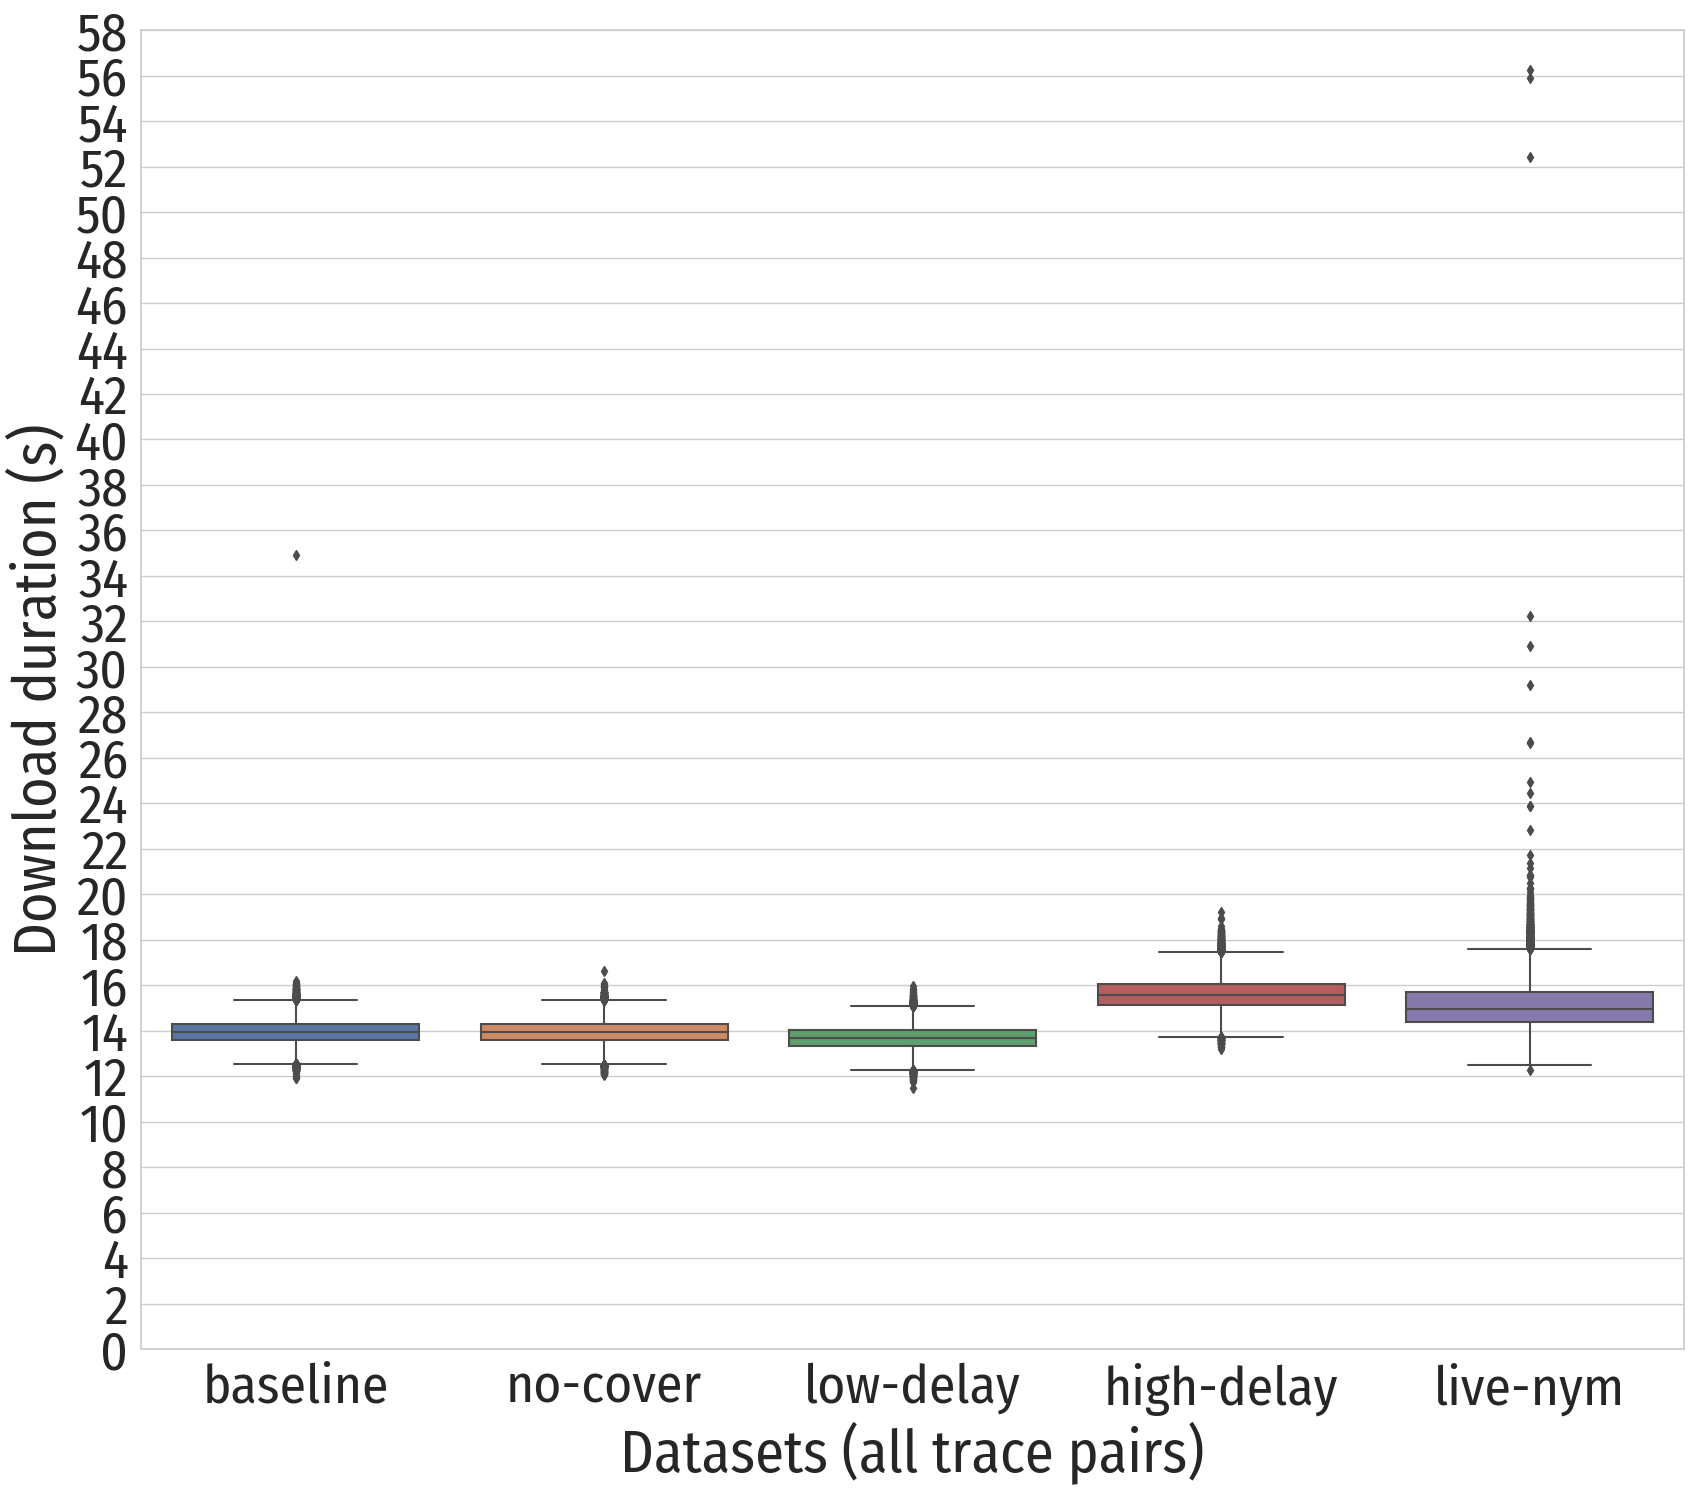

In [12]:
# Set figure size.
plt.figure(figsize=(18, 16))

# Set specific Seaborn base style, adjust font.
sb.set_theme(style = "whitegrid", font = "Fira Sans Condensed", font_scale = 3.5)

# Draw boxplot.
fig = sb.boxplot(data = df_exps_all)

# Make y-axis start at 0.
fig.set_ylim(bottom = 0, top = y_axis_max)
fig.set_yticks(np.arange(0.0, (y_axis_max + 0.1), 2.0))

# Provide label for both axes.
plt.xlabel("Datasets (all trace pairs)")
plt.ylabel("Download duration (s)")

# Condense space.
plt.tight_layout()

# Export and finalize PDF of this plot.
plt.savefig("exps_all-trace-pairs_duration_boxplot.pdf", bbox_inches="tight")
! pdfcrop --margin 0 exps_all-trace-pairs_duration_boxplot.pdf
! mv exps_all-trace-pairs_duration_boxplot-crop.pdf exps_all-trace-pairs_duration_boxplot.pdf

# Show figure also direcly below.
plt.show()

In [13]:
# Print descriptive statistics for exp01.
df_exp01.describe()

,baseline
count,35266.000000
mean,13.946841
std,0.539875
min,11.902919
25%,13.595152
50%,13.936412
75%,14.297581
max,34.919993


In [14]:
# Print descriptive statistics for exp02.
df_exp02.describe()

,no-cover
count,35263.000000
mean,13.935628
std,0.526197
min,12.050922
25%,13.575837
50%,13.922943
75%,14.283287
max,16.608988


In [15]:
# Print descriptive statistics for exp05.
df_exp05.describe()

,low-delay
count,37160.000000
mean,13.670525
std,0.521302
min,11.488540
25%,13.318355
50%,13.660679
75%,14.023186
max,15.953013


In [16]:
# Print descriptive statistics for exp06.
df_exp06.describe()

,high-delay
count,35801.000000
mean,15.610758
std,0.702813
min,13.198924
25%,15.124386
50%,15.581204
75%,16.062227
max,19.230886


In [17]:
# Print descriptive statistics for exp08.
df_exp08.describe()

,live-nym
count,35611.000000
mean,15.110752
std,1.062762
min,12.256771
25%,14.401556
50%,14.936976
75%,15.682949
max,56.255692
